In [7]:
import os 
os.listdir("dataset")

['IMDb Movies India.csv.zip', 'movie_rating_prediction.ipynb']

In [11]:
# Importing Required Libraries and reading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("dataset/IMDb Movies India.csv.zip",compression="zip", encoding="latin-1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
# Dataset Overview
df.shape

(15509, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [14]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [15]:
# Data Cleaning
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [16]:
df.dropna(inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [17]:
df['Year'] = df['Year'].astype(str).str.extract('(\d+)')
df['Year'] = df['Year'].astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = df['Duration'].astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = df['Votes'].astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [20]:
# Exploratory Data Analysis
label_encoder = LabelEncoder()

df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [21]:
X = df[['Year', 'Duration', 'Votes', 'Genre', 'Director', 
        'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [22]:
# Feature Engineering
features = ['Genre','Director','Actor 1','Actor 2','Actor 3','Year','Duration','Votes']
target = 'Rating'
df = df[features + [target]]
df.head()

,Genre,Director,Actor 1,Actor 2,Actor 3,Year,Duration,Votes,Rating
1,229,629,1352,2272,319,2019,109,8,7.0
3,184,1335,1198,719,2148,2019,110,35,4.4
5,157,1530,378,75,2045,1997,147,827,4.7
6,289,2044,692,1112,2524,2005,142,1086,7.4
8,320,135,1934,1175,1013,2012,82,326,5.6


In [23]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,Genre,Director,Actor 1,Actor 2,Actor 3,Year,Duration,Votes,Rating
1,229,629,1352,2272,319,2019,109,8,7.0
3,184,1335,1198,719,2148,2019,110,35,4.4
5,157,1530,378,75,2045,1997,147,827,4.7
6,289,2044,692,1112,2524,2005,142,1086,7.4
8,320,135,1934,1175,1013,2012,82,326,5.6


In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
df.head()

,Genre,Director,Actor 1,Actor 2,Actor 3,Year,Duration,Votes,Rating
1,229,629,1352,2272,319,2019,109,8,7.0
3,184,1335,1198,719,2148,2019,110,35,4.4
5,157,1530,378,75,2045,1997,147,827,4.7
6,289,2044,692,1112,2524,2005,142,1086,7.4
8,320,135,1934,1175,1013,2012,82,326,5.6


In [25]:
# Model evaluation
y_pred = model.predict(X_test)
df.head()

,Genre,Director,Actor 1,Actor 2,Actor 3,Year,Duration,Votes,Rating
1,229,629,1352,2272,319,2019,109,8,7.0
3,184,1335,1198,719,2148,2019,110,35,4.4
5,157,1530,378,75,2045,1997,147,827,4.7
6,289,2044,692,1112,2524,2005,142,1086,7.4
8,320,135,1934,1175,1013,2012,82,326,5.6


In [26]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
df.head()

Mean Absolute Error: 0.8531925795053004
Root Mean Squared Error: 1.1303093614803765


,Genre,Director,Actor 1,Actor 2,Actor 3,Year,Duration,Votes,Rating
1,229,629,1352,2272,319,2019,109,8,7.0
3,184,1335,1198,719,2148,2019,110,35,4.4
5,157,1530,378,75,2045,1997,147,827,4.7
6,289,2044,692,1112,2524,2005,142,1086,7.4
8,320,135,1934,1175,1013,2012,82,326,5.6


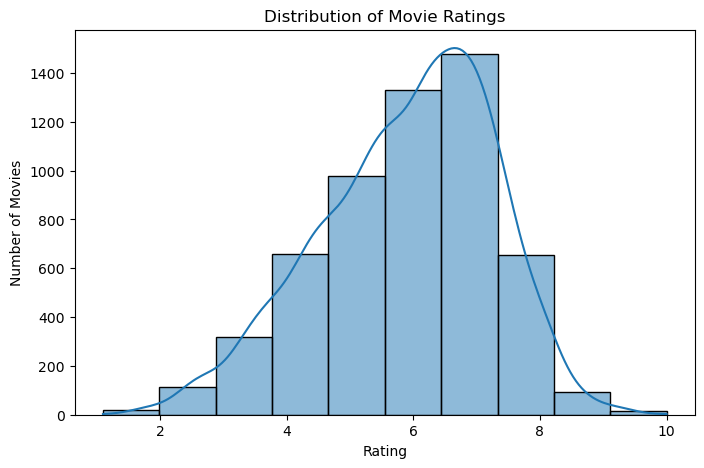

In [27]:
# Model visualization
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

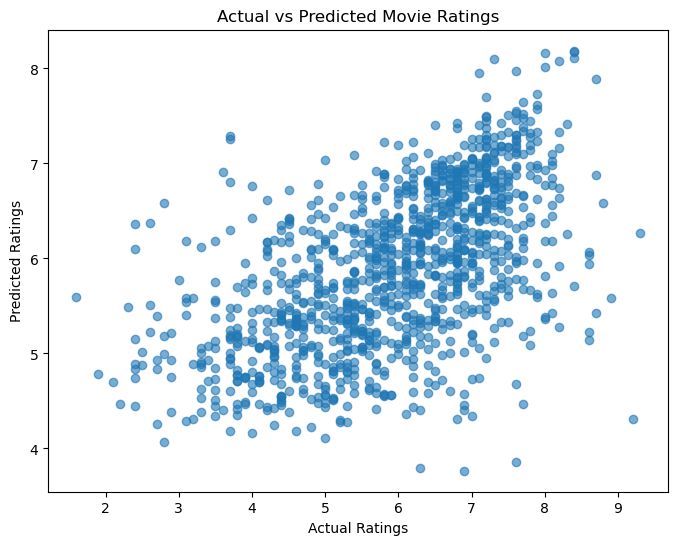

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()

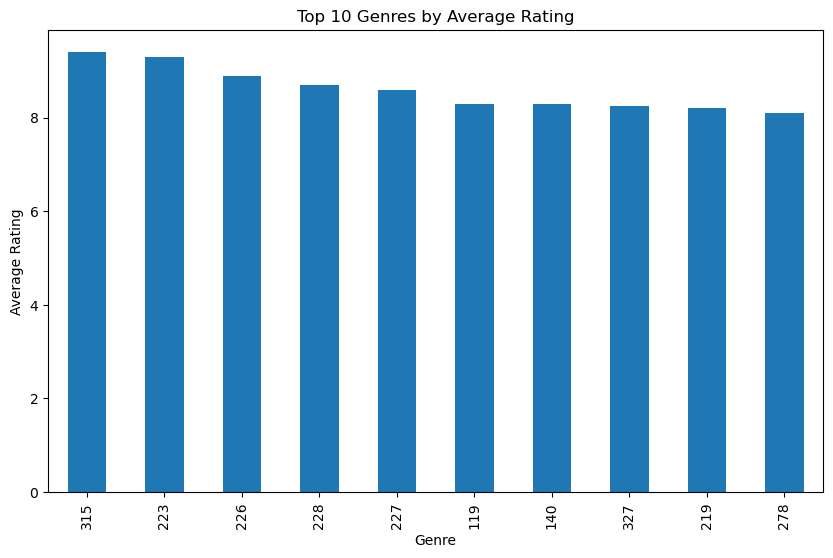

In [29]:
plt.figure(figsize=(10,6))

df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

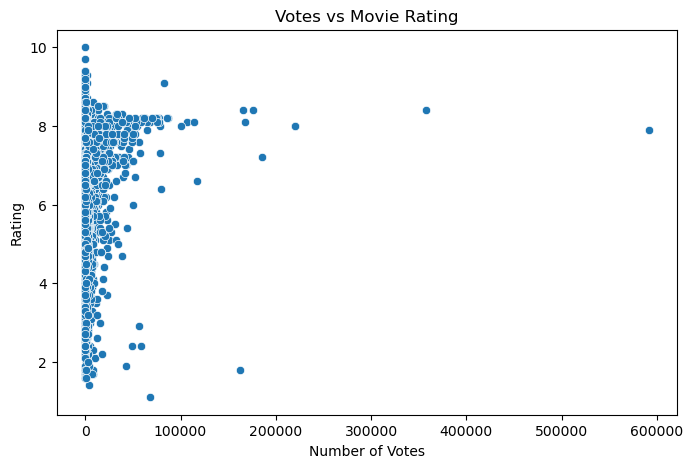

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Votes'], y=df['Rating'])
plt.title("Votes vs Movie Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()

In [31]:
sample_movie = X_test.iloc[0:1]
predicted_rating = model.predict(sample_movie)

print("Predicted Movie Rating:", predicted_rating[0])

Predicted Movie Rating: 5.102000000000002
